# Simple Neural Network Practice

In this notebook, I will be creating multiple very simple neural networks. Each one will have different amounts of hidden layers and hidden units to test the accuracy and training time for each one.

In [59]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

Load the data

In [60]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
X_train.shape

(60000, 28, 28)

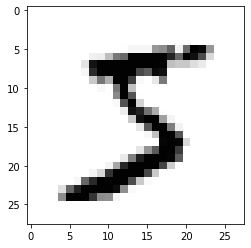

In [62]:
plt.imshow(X_train[0], cmap='Greys')

In [63]:
y_train[0]

5

In [64]:
X_train = X_train.reshape(60000, 28*28)

Everything looks good with the data now we can start making our neural networks.

In [48]:
model = Sequential([Dense(10, activation='softmax')])

In [49]:
# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 2s 833us/step - loss: 9.8941 - accuracy: 0.8380


This is the simplest form of the neural network with one hidden layer and 10 hidden units. We see an accuracy of 84% and time of 2s for one epoch.

Real quick let's add 10 epochs and a validation split of 0.3. This will let the model train multiple times and give us a validation accuracy metric to make sure our model isn't memorizing data.

In [51]:
model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 6.2091 - accuracy: 0.8767 - val_loss: 5.2571 - val_accuracy: 0.9003
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 5.7549 - accuracy: 0.8832 - val_loss: 5.7264 - val_accuracy: 0.8939
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.5416 - accuracy: 0.8851 - val_loss: 5.8896 - val_accuracy: 0.8889
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 5.2338 - accuracy: 0.8879 - val_loss: 5.2352 - val_accuracy: 0.8985
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 5.2243 - accuracy: 0.8889 - val_loss: 7.0197 - val_accuracy: 0.8693
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 5.1510 - accuracy: 0.8918 - val_loss: 5.5408 - val_accuracy: 0.8946
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 4.9188 - accuracy: 0.8928 - val_loss: 5.6435 - val_accuracy:

This gives us a better representation. So the first model gives us an accuracy of 89.5% and it took 2 s an epoch to compute. 

In [52]:
second_model = Sequential([Dense(100, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
second_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

second_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 10.4737 - accuracy: 0.8305 - val_loss: 6.5661 - val_accuracy: 0.8759
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 6.1644 - accuracy: 0.8764 - val_loss: 6.2269 - val_accuracy: 0.8772
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.6708 - accuracy: 0.8818 - val_loss: 6.9043 - val_accuracy: 0.8722
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.3853 - accuracy: 0.8847 - val_loss: 6.1449 - val_accuracy: 0.8807
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.3554 - accuracy: 0.8896 - val_loss: 5.9430 - val_accuracy: 0.8847
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.3108 - accuracy: 0.8885 - val_loss: 7.7293 - val_accuracy: 0.8617
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 5.2397 - accuracy: 0.8899 - val_loss: 5.7144 - val_accuracy

So the second model contained 1 hidden layer with 100 hidden units. As you can see this hurt the accuracy of the model in which it was 86.2% accurate. Also the training time was the same as model one.

In [53]:
third_model = Sequential([Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10), 
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
third_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

third_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.4799 - accuracy: 0.6920 - val_loss: 0.6004 - val_accuracy: 0.8202
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5123 - accuracy: 0.8501 - val_loss: 0.5011 - val_accuracy: 0.8554
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4284 - accuracy: 0.8778 - val_loss: 0.4044 - val_accuracy: 0.8828
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3870 - accuracy: 0.8875 - val_loss: 0.3951 - val_accuracy: 0.8869
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3658 - accuracy: 0.8954 - val_loss: 0.3778 - val_accuracy: 0.8937
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3534 - accuracy: 0.9003 - val_loss: 0.3709 - val_accuracy: 0.8956
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3440 - accuracy: 0.9025 - val_loss: 0.3951 - val_accuracy:

The third model contained 10 hidden layers with 10 hidden units each. This actually performed well compared to the previous two. It ended with an accuracy of 89.8% but reached into the 90s during training. The training time was also still the same.

In [54]:
fourth_model = Sequential([Dense(10), 
                          Dense(10), 
                          Dense(10),  
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
fourth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

fourth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 5.2713 - accuracy: 0.7856 - val_loss: 0.6674 - val_accuracy: 0.8511
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5173 - accuracy: 0.8667 - val_loss: 0.4367 - val_accuracy: 0.8815
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4352 - accuracy: 0.8799 - val_loss: 0.4245 - val_accuracy: 0.8824
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4123 - accuracy: 0.8865 - val_loss: 0.4230 - val_accuracy: 0.8832
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4041 - accuracy: 0.8882 - val_loss: 0.4179 - val_accuracy: 0.8891
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4019 - accuracy: 0.8891 - val_loss: 0.3833 - val_accuracy: 0.8905
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3876 - accuracy: 0.8936 - val_loss: 0.3746 - val_accuracy:

The fourth model contains 4 hidden layers with 10 hidden units each. Again not much difference in the last few this is meant to compare to the next couple.

In [55]:
fifth_model = Sequential([Dense(10), 
                          Dense(20), 
                          Dense(30),  
                          Dense(40, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
fifth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

fifth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 3.1485 - accuracy: 0.7582 - val_loss: 0.6079 - val_accuracy: 0.8529
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6205 - accuracy: 0.8457 - val_loss: 0.5854 - val_accuracy: 0.8525
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5821 - accuracy: 0.8568 - val_loss: 0.4982 - val_accuracy: 0.8716
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5356 - accuracy: 0.8650 - val_loss: 0.5722 - val_accuracy: 0.8669
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4985 - accuracy: 0.8731 - val_loss: 0.5507 - val_accuracy: 0.8528
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4646 - accuracy: 0.8778 - val_loss: 0.4402 - val_accuracy: 0.8851
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4504 - accuracy: 0.8809 - val_loss: 0.4147 - val_accuracy:

The fifth model has increasing more hidden units in the 4 hidden layers. This performs better than the previous giving an val_accuracy of 90.7%.

In [56]:
sixth_model = Sequential([Dense(40), 
                          Dense(30), 
                          Dense(20), 
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
sixth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

sixth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 7.7328 - accuracy: 0.8367 - val_loss: 1.7239 - val_accuracy: 0.8656
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 1.0883 - accuracy: 0.8640 - val_loss: 0.8356 - val_accuracy: 0.8684
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6904 - accuracy: 0.8647 - val_loss: 0.6663 - val_accuracy: 0.8579
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5980 - accuracy: 0.8674 - val_loss: 0.5269 - val_accuracy: 0.8839
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5516 - accuracy: 0.8713 - val_loss: 0.4893 - val_accuracy: 0.8764
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.8771 - val_loss: 0.4535 - val_accuracy: 0.8895
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4775 - accuracy: 0.8797 - val_loss: 0.5808 - val_accuracy:

This model with the decreasing amount of hidden units per layer performed worst then the previos few which is interesting. I would assume it is because you are starting with a big scope.

In [57]:
seventh_model = Sequential([Dense(10), 
                          Dense(20), 
                          Dense(20), 
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
seventh_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

seventh_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 3.6237 - accuracy: 0.7788 - val_loss: 0.6631 - val_accuracy: 0.8359
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6545 - accuracy: 0.8383 - val_loss: 0.6840 - val_accuracy: 0.8399
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5849 - accuracy: 0.8530 - val_loss: 0.5921 - val_accuracy: 0.8534
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5737 - accuracy: 0.8585 - val_loss: 0.6129 - val_accuracy: 0.8548
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5431 - accuracy: 0.8642 - val_loss: 0.5504 - val_accuracy: 0.8661
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5087 - accuracy: 0.8692 - val_loss: 0.5221 - val_accuracy: 0.8647
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4940 - accuracy: 0.8724 - val_loss: 0.5353 - val_accuracy:

This model again is average is not better than the original simple model of one hidden layer.

In [65]:
eigth_model = Sequential([Dense(10), 
                          Dense(20), 
                          Dense(50),
                          Dense(20), 
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
eigth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

eigth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.8617 - accuracy: 0.7360 - val_loss: 1.0033 - val_accuracy: 0.7669
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7642 - accuracy: 0.8241 - val_loss: 0.7484 - val_accuracy: 0.8223
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6307 - accuracy: 0.8464 - val_loss: 0.5972 - val_accuracy: 0.8424
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5456 - accuracy: 0.8595 - val_loss: 0.5112 - val_accuracy: 0.8708
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4787 - accuracy: 0.8754 - val_loss: 0.4820 - val_accuracy: 0.8686
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4217 - accuracy: 0.8842 - val_loss: 0.3867 - val_accuracy: 0.8986
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3881 - accuracy: 0.8926 - val_loss: 0.4288 - val_accuracy:

Average again compared to others

In [66]:
ninth_model = Sequential([Dense(10), 
                          Dense(40), 
                          Dense(60),
                          Dense(40), 
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
ninth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

ninth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.5789 - accuracy: 0.7469 - val_loss: 1.3119 - val_accuracy: 0.7947
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8802 - accuracy: 0.8236 - val_loss: 0.6789 - val_accuracy: 0.8356
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.6260 - accuracy: 0.8489 - val_loss: 0.5364 - val_accuracy: 0.8629
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4813 - accuracy: 0.8709 - val_loss: 0.5081 - val_accuracy: 0.8628
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8840 - val_loss: 0.4188 - val_accuracy: 0.8838
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3755 - accuracy: 0.8930 - val_loss: 0.4420 - val_accuracy: 0.8701
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3679 - accuracy: 0.8952 - val_loss: 0.4386 - val_accuracy:

Maybe another idea

In [68]:
tenth_model = Sequential([Dense(10), 
                          Dense(20), 
                          Dense(25),
                          Dense(40), 
                          Dense(40), 
                          Dense(25),
                          Dense(20),
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
tenth_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

tenth_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.1240 - accuracy: 0.7373 - val_loss: 0.5888 - val_accuracy: 0.8347
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5295 - accuracy: 0.8559 - val_loss: 0.4578 - val_accuracy: 0.8688
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4183 - accuracy: 0.8808 - val_loss: 0.3923 - val_accuracy: 0.8897
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3790 - accuracy: 0.8920 - val_loss: 0.3713 - val_accuracy: 0.8973
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3609 - accuracy: 0.8969 - val_loss: 0.3655 - val_accuracy: 0.8965
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3536 - accuracy: 0.8990 - val_loss: 0.3542 - val_accuracy: 0.9027
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3515 - accuracy: 0.8980 - val_loss: 0.3420 - val_accuracy:

Hmmmm

In [75]:
eleven_model = Sequential([Dense(10),
                          Dense(100),
                          Dense(10, activation='softmax')])

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
eleven_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

eleven_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.0746 - accuracy: 0.7643 - val_loss: 0.8915 - val_accuracy: 0.8390
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8986 - accuracy: 0.8210 - val_loss: 1.1885 - val_accuracy: 0.8081
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.9074 - accuracy: 0.8266 - val_loss: 0.7357 - val_accuracy: 0.8565
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8213 - accuracy: 0.8340 - val_loss: 0.6945 - val_accuracy: 0.8597
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.8135 - accuracy: 0.8377 - val_loss: 0.8010 - val_accuracy: 0.8522
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7687 - accuracy: 0.8414 - val_loss: 1.3328 - val_accuracy: 0.7716
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7248 - accuracy: 0.8487 - val_loss: 0.6776 - val_accuracy:

I think we have maxed out our model accuracy.